<a href="https://colab.research.google.com/github/SumayyaShaji/project1/blob/main/project_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
#Data Viz Pkg
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import numpy as np # linear algebra
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
df = pd.read_csv("covid-19.csv", encoding='utf-8')
df.head()

,source,headlines,description
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko..."
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ..."
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...
3,Devex,COVID-19 in 2021 â€” a timeline of the coronav...,"And for earlier news, visit the timeline for 2..."
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...


In [84]:
df.shape

(1034, 3)

In [85]:
df = df.drop_duplicates('headlines')
df.shape


(941, 3)

In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 941 entries, 0 to 1033
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       940 non-null    object
 1   headlines    940 non-null    object
 2   description  940 non-null    object
dtypes: object(3)
memory usage: 29.4+ KB


In [87]:
df.describe()


,source,headlines,description
count,940,940,940
unique,164,940,918
top,Times of India,Where Australia's first international tourists...,Trending Topics Â· Top Stories Right Now Â· Fo...
freq,95,1,7


In [88]:
df.isnull().mean()


source         0.001063
headlines      0.001063
description    0.001063
dtype: float64

In [89]:
df.head(20)

,source,headlines,description
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko..."
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ..."
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...
3,Devex,COVID-19 in 2021 â€” a timeline of the coronav...,"And for earlier news, visit the timeline for 2..."
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...
5,ABC,COVID live updates: Australia records highest ...,Download the ABC News app and subscribe to our...
6,Valneva,Valneva's Inactivated COVID-19 Vaccine Candida...,All 30 samples (100%) presented neutralizing a...
7,Traveller.com.au,New Zealand border opening: Our neighbour has ...,The thinking being that anyone travelling is l...
8,Fortune,"COVID-19 cases are plummeting in Asia, and sci...","COVID-19 cases are plummeting in Asia, and sci..."
9,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko..."


In [90]:
df.columns

Index(['source', 'headlines', 'description'], dtype='object')

In [91]:
df.dtypes


source         object
headlines      object
description    object
dtype: object

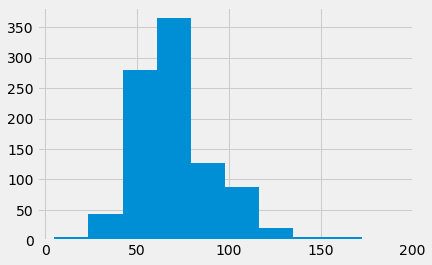

In [92]:
df['headlines'].str.len().hist()


In [93]:
df['source'].unique()

array(['ABC', 'UPI', 'The Japan Times', 'Devex', 'Firstpost', 'Valneva',
       'Traveller.com.au', 'Fortune', 'The Economic Times', 'UN News',
       'Times of India', 'The New York Times', 'BBC',
       'Carnegie Endowment for International Peace', 'The Hindu',
       'ThePrint', 'The Financial Express', 'Bloomberg.com',
       'Business Wire', 'DVIDS', 'TIME', 'Financial Times', 'Japan Today',
       'UCA News', 'Business Standard', 'USA Today', 'Hindustan Times',
       'Asahi Shimbun', 'Deccan Herald',
       'Regulatory Affairs Professionals Society', 'Nature', 'Reuters',
       'The White House', 'Healthline', 'The Boston Globe',
       'Down To Earth', 'CNN', 'WHO | World Health Organization',
       'Nikkei Asia', 'NBC News', 'CNBC', 'Pharmaceutical Technology',
       'OpIndia', 'The New Yorker', 'News18', 'Forbes India', 'India.com',
       'India Today', 'SDG Knowledge Hub', 'Mint', 'NPR', 'The Economist',
       'Human Rights Watch', 'Medical News Today', 'CBC',
       'Pe

In [94]:
df['source'].value_counts()

Times of India       95
Hindustan Times      51
The Hindu            51
Schengen Visa        42
Business Standard    39
                     ..
Global News           1
The Independent       1
The New Yorker        1
Politico              1
DTNext                1
Name: source, Length: 164, dtype: int64

In [95]:
df['source'].value_counts().nlargest(30)

Times of India                     95
Hindustan Times                    51
The Hindu                          51
Schengen Visa                      42
Business Standard                  39
The Economic Times                 36
News18                             30
Reuters                            30
The Indian Express                 28
NDTV.com                           27
The Local Italy                    25
The Guardian                       25
France 24                          24
The Financial Express              24
Mint                               17
BBC                                16
India Today                        16
Al Jazeera                         16
Firstpost                          14
USA Today                          12
India.com                          12
WHO | World Health Organization    11
Arab News                          10
Bloomberg.com                       9
WION                                8
CNBC                                8
Nature      

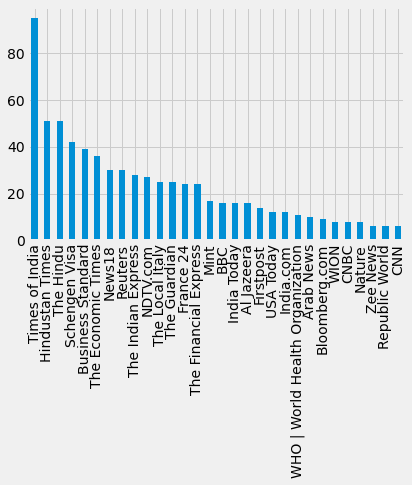

In [96]:
df['source'].value_counts().nlargest(30).plot(kind='bar')

In [97]:
df['headlines']=df['headlines'].apply(str)


In [98]:
!pip install neattext
# Load Text Cleaning Package
import neattext.functions as nfx

In [99]:
# Cleaning Text
df['clean_tweet'] = df['headlines'].apply(nfx.remove_hashtags)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)
#Remove blank rows if any.
df['clean_tweet'] .dropna(inplace=True)
# Change all the text to lower case.
df['clean_tweet']  = [entry.lower() for entry in df['clean_tweet'] ]
df[['headlines','clean_tweet']]




,headlines,clean_tweet
0,Where Australia's first international tourists...,where australias first international tourists ...
1,China hasn't reported COVID-19 death in year w...,china hasnt reported covid19 death in year wit...
2,"Glimmers of hope, but Doomsday Clock stuck at ...",glimmers of hope but doomsday clock stuck at 1...
3,COVID-19 in 2021 â€” a timeline of the coronav...,covid19 in 2021 â€” a timeline of the coronavi...
4,Explained: All you wanted to know ski jumping ...,explained: all you wanted to know ski jumping ...
...,...,...
1029,"France, Italy impose strict covid-19 vaccine m...",france italy impose strict covid19 vaccine man...
1030,Italy â€“ once overwhelmed by COVID-19 â€“ tur...,italy â€“ once overwhelmed by covid19 â€“ turn...
1031,Italy's deleveraging success could help limit ...,italys deleveraging success could help limit m...
1032,Italy bans New Year events as COVID infections...,italy bans new year events as covid infections...


In [100]:
# Tokenization
df['clean_tweet']= [word_tokenize(entry) for entry in df['clean_tweet']]
df['clean_tweet']


0       [where, australias, first, international, tour...
1       [china, hasnt, reported, covid19, death, in, y...
2       [glimmers, of, hope, but, doomsday, clock, stu...
3       [covid19, in, 2021, â€, ”, a, timeline, of, th...
4       [explained, :, all, you, wanted, to, know, ski...
                              ...                        
1029    [france, italy, impose, strict, covid19, vacci...
1030    [italy, â€, “, once, overwhelmed, by, covid19,...
1031    [italys, deleveraging, success, could, help, l...
1032    [italy, bans, new, year, events, as, covid, in...
1033    [four, more, italian, regions, become, yellow,...
Name: clean_tweet, Length: 941, dtype: object

In [101]:
df['clean_tweet'].head(15)


0     [where, australias, first, international, tour...
1     [china, hasnt, reported, covid19, death, in, y...
2     [glimmers, of, hope, but, doomsday, clock, stu...
3     [covid19, in, 2021, â€, ”, a, timeline, of, th...
4     [explained, :, all, you, wanted, to, know, ski...
5     [covid, live, updates, :, australia, records, ...
6     [valnevas, inactivated, covid19, vaccine, cand...
7     [new, zealand, border, opening, :, our, neighb...
8     [covid19, cases, are, plummeting, in, asia, an...
9     [where, australias, first, international, tour...
10    [china, reportedly, takes, over, ugandaâ€™s, a...
11    [coronavirus, news, live, updates, :, gurgaon,...
12    [china, headed, towards, carbon, neutrality, b...
13    [now, you, can, translate, youtube, comments, ...
14    [covid, news, :, us, to, tighten, testing, for...
Name: clean_tweet, dtype: object

In [102]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(words):
  return [word for word in words if  not word in stop_words]
df['clean_tweet']=df['clean_tweet'].apply(lambda x: remove_stopwords(x))


def stemming(words):
  ps=PorterStemmer()
  return [ps.stem(word) for word in words]
df['clean_tweet']=df['clean_tweet'].apply(lambda x: stemming(x))

def lemmatizing(words):
    lemmatizer =WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]
df['clean_tweet']=df['clean_tweet'].apply(lambda x: lemmatizing(x))

def final_text(words):
     return ' '.join(words)
df['clean_tweet']=df['clean_tweet'].apply(lambda x:final_text(x))


In [103]:
df['clean_tweet'].head(1)


0    australia first intern tourist come border reo...
Name: clean_tweet, dtype: object

In [104]:
def get_sentiment(headlines):
    blob = TextBlob(headlines)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result


In [105]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)
df['sentiment_results']


0       {'polarity': 0.25, 'subjectivity': 0.333333333...
1       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
2       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4       {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                              ...                        
1029    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1030    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1031    {'polarity': 0.3, 'subjectivity': 0.0, 'sentim...
1032    {'polarity': 0.13636363636363635, 'subjectivit...
1033    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 941, dtype: object

In [106]:
df = df.join(pd.json_normalize(df['sentiment_results']))
df.head(19)


,source,headlines,description,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko...",australia first intern tourist come border reo...,"{'polarity': 0.25, 'subjectivity': 0.333333333...",0.250000,0.333333,Positive
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ...",china hasnt report covid19 death year zero toler,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...,glimmer hope doomsday clock stuck 100 second,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
3,Devex,COVID-19 in 2021 â€” a timeline of the coronav...,"And for earlier news, visit the timeline for 2...",covid19 2021 â€ ” timelin coronaviru outbreak,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...,explain : want know ski jump beij winter olymp...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
5,ABC,COVID live updates: Australia records highest ...,Download the ABC News app and subscribe to our...,covid live updat : australia record highest da...,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.500000,Positive
6,Valneva,Valneva's Inactivated COVID-19 Vaccine Candida...,All 30 samples (100%) presented neutralizing a...,valneva inactiv covid19 vaccin candid shown,"{'polarity': 0.6, 'subjectivity': 0.8, 'sentim...",0.600000,0.800000,Positive
7,Traveller.com.au,New Zealand border opening: Our neighbour has ...,The thinking being that anyone travelling is l...,new zealand border open : neighbour never felt,"{'polarity': 0.06818181818181818, 'subjectivit...",0.068182,0.477273,Positive
8,Fortune,"COVID-19 cases are plummeting in Asia, and sci...","COVID-19 cases are plummeting in Asia, and sci...",covid19 case plummet asia scientist arenâ€™t 1...,"{'polarity': 0.5, 'subjectivity': 0.8888888888...",0.500000,0.888889,Positive
9,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko...",australia first intern tourist come border reo...,"{'polarity': 0.25, 'subjectivity': 0.333333333...",0.250000,0.333333,Positive


In [107]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['clean_tweet'],df['sentiment'],test_size=0.3)


In [108]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)


In [109]:
Tfidf_vect = TfidfVectorizer(max_features=None)
Tfidf_vect.fit(df['clean_tweet'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)


{'australia': 352, 'first': 865, 'intern': 1084, 'tourist': 1936, 'come': 545, 'border': 418, 'reopen': 1630, 'februari': 844, '21': 85, 'china': 509, 'hasnt': 976, 'report': 1634, 'covid19': 602, 'death': 654, 'year': 2094, 'zero': 2101, 'toler': 1925, 'glimmer': 922, 'hope': 1011, 'doomsday': 724, 'clock': 527, 'stuck': 1837, '100': 4, 'second': 1714, '2021': 74, 'timelin': 1920, 'coronaviru': 590, 'outbreak': 1415, 'explain': 810, 'want': 2043, 'know': 1140, 'ski': 1775, 'jump': 1131, 'beij': 388, 'winter': 2071, 'olymp': 1391, '2022': 76, 'covid': 601, 'live': 1195, 'updat': 1997, 'record': 1605, 'highest': 990, 'daili': 640, 'number': 1374, 'valneva': 2013, 'inactiv': 1051, 'vaccin': 2009, 'candid': 454, 'shown': 1753, 'new': 1349, 'zealand': 2100, 'open': 1401, 'neighbour': 1345, 'never': 1348, 'felt': 846, 'case': 466, 'plummet': 1490, 'asia': 338, 'scientist': 1702, 'arenâ': 328, 'sure': 1857, '22': 88, 'reportedli': 1635, 'take': 1870, 'ugandaâ': 1979, 'airport': 279, 'account

In [110]:
print(Train_X_Tfidf)


  (0, 1729)	0.34352171854603314
  (0, 1572)	0.3939765343121203
  (0, 1526)	0.3334823279484552
  (0, 1477)	0.3939765343121203
  (0, 1436)	0.3939765343121203
  (0, 1102)	0.15268374497839268
  (0, 641)	0.3939765343121203
  (0, 292)	0.3558089395985922
  (1, 1973)	0.3547252437312179
  (1, 1760)	0.347482432874791
  (1, 1605)	0.2361737524394334
  (1, 1132)	0.3836270916882718
  (1, 990)	0.3297920513530255
  (1, 958)	0.39734881763117597
  (1, 654)	0.2268545220313437
  (1, 602)	0.11879202465920287
  (1, 466)	0.15709573157111067
  (1, 56)	0.43997239153113404
  (2, 2050)	0.28515713368133216
  (2, 1349)	0.1917719174655577
  (2, 980)	0.2891573568342993
  (2, 622)	0.47210239249887215
  (2, 601)	0.16075944524956362
  (2, 463)	0.4116423468825798
  (2, 376)	0.4263661335827289
  :	:
  (655, 2044)	0.4229592788523704
  (655, 2024)	0.38198389851975867
  (655, 1828)	0.36879277239199587
  (655, 1717)	0.38198389851975867
  (655, 923)	0.3123077343362483
  (655, 602)	0.11419850438436882
  (655, 511)	0.3221831328

In [111]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)


SVM Accuracy Score ->  61.130742049469966


In [126]:
confusion_matrix(Test_Y,predictions_SVM)


array([[  0,  11,   1,   0],
       [  0, 155,   8,   3],
       [  0,  68,  12,   0],
       [  0,  19,   0,   6]])

In [127]:
print(classification_report(Test_Y,predictions_SVM))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.61      0.93      0.74       166
           2       0.57      0.15      0.24        80
           3       0.67      0.24      0.35        25

    accuracy                           0.61       283
   macro avg       0.46      0.33      0.33       283
weighted avg       0.58      0.61      0.53       283



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
from sklearn.metrics import classification_report

In [133]:
review = """vaccines are not effective"""
review_vector = Tfidf_vect.transform([review])
print(SVM.predict(review_vector))

[1]


calculate sentiment polarity

In [112]:
polarity=[]
subjectivity=[]
for i in df['headlines'].values:
  try:

    analysis =TextBlob(i)
    polarity.append(analysis.sentiment.polarity)
    subjectivity.append(analysis.sentiment.subjectivity)
  except:

    polarity.append(0)
    subjectivity.append(0)  

In [113]:
df['polarity']=polarity
df['subjectivity']=subjectivity

#dislaying positive news

In [114]:
df[df.polarity>0].head(20)

,source,headlines,description,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko...",australia first intern tourist come border reo...,"{'polarity': 0.25, 'subjectivity': 0.333333333...",0.125000,0.166667,Positive
5,ABC,COVID live updates: Australia records highest ...,Download the ABC News app and subscribe to our...,covid live updat : australia record highest da...,"{'polarity': 0.13636363636363635, 'subjectivit...",0.068182,0.250000,Positive
7,Traveller.com.au,New Zealand border opening: Our neighbour has ...,The thinking being that anyone travelling is l...,new zealand border open : neighbour never felt,"{'polarity': 0.06818181818181818, 'subjectivit...",0.136364,0.454545,Positive
8,Fortune,"COVID-19 cases are plummeting in Asia, and sci...","COVID-19 cases are plummeting in Asia, and sci...",covid19 case plummet asia scientist arenâ€™t 1...,"{'polarity': 0.5, 'subjectivity': 0.8888888888...",0.500000,0.888889,Positive
9,ABC,Where Australia's first international tourists...,"Visitors from New Zealand, Singapore, South Ko...",australia first intern tourist come border reo...,"{'polarity': 0.25, 'subjectivity': 0.333333333...",0.125000,0.166667,Positive
11,The Economic Times,"Coronavirus News Live Updates: Gurgaon, 4 othe...","India reported 22,775 new cases of Covid-19 an...",coronaviru news live updat : gurgaon 4 haryana...,"{'polarity': 0.13636363636363635, 'subjectivit...",0.005682,0.437500,Positive
15,BBC,Austria to go into full lockdown as Covid surges,Many other European countries are imposing res...,austria go full lockdown covid surg,"{'polarity': 0.35, 'subjectivity': 0.55, 'sent...",0.350000,0.550000,Positive
19,The Financial Express,Coronavirus (Covid-19) India Highlights: Get C...,"Coronavirus Vaccine Registration, Covid-19 Ind...",coronaviru ( covid19 ) india highlight : get c...,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive
26,Financial Times,Live news from February 7: Tesla subpoenaed by...,Live news from February 7: Tesla subpoenaed by...,live news februari 7 : tesla subpoena sec,"{'polarity': 0.018181818181818174, 'subjectivi...",0.018182,0.550000,Positive
30,Business Standard,New Covid wave batters Afghanistans crumbling ...,"The facility, called the Afghan Japan Communic...",new covid wave batter afghanistan crumbl healt...,"{'polarity': 0.13636363636363635, 'subjectivit...",0.136364,0.454545,Positive


#displaying negative news

In [115]:
df[df.polarity<0].head(10)

,source,headlines,description,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
28,Financial Times,Live news from January 21: Global stocks notch...,The tech-heavy Nasdaq Composite index fell 7.6...,live news januari 21 : global stock notch wors...,"{'polarity': -0.2878787878787879, 'subjectivit...",-0.287879,0.500000,Negative
29,UCA News,The India-China game of one-upmanship,New Delhi's boycott of the Beijing Winter Olym...,indiachina game oneupmanship,"{'polarity': -0.4, 'subjectivity': 0.4, 'senti...",-0.400000,0.400000,Negative
68,OpIndia,CPI(M) congratulates China for administering 2...,The number of Covid-19 vaccine doses administe...,cpi ( ) congratul china administ 200 mn vaccin...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",-0.071429,0.214286,Positive
76,Hindustan Times,"Indonesia doctors fell sick, many died after t...","Not just Indonesia, other countries like Mongo...",indonesia doctor fell sick mani die take chine...,"{'polarity': -0.7142857142857143, 'subjectivit...",-0.107143,0.678571,Neutral
117,Pew Research Center,Most Americans Have 'Cold' Views of China. Her...,"â€œVast economic growth in the last 50 years, ...",american cold view china here,"{'polarity': -0.3, 'subjectivity': 0.5, 'senti...",-0.050000,0.750000,Neutral
172,The Financial Express,Coronavirus Omicron Highlights: At least one d...,"COVID-19 | Delhi reports 118 positive cases, o...",coronaviru omicron highlight : least one dose ...,"{'polarity': -0.3, 'subjectivity': 0.4, 'senti...",-0.150000,0.250000,Positive
188,The Hindu,Russia marks another record number of everyday...,Russian President Vladimir Putin has ordered R...,russia mark anoth record number everyday covid...,"{'polarity': -0.2, 'subjectivity': 0.6, 'senti...",-0.200000,0.600000,Positive
210,The Financial Express,Coronavirus Omicron India Live News Updates: 8...,"Covid-19 India Live News, New Omicron Variant ...",coronaviru omicron india live news updat : 85 ...,"{'polarity': -0.015909090909090907, 'subjectiv...",-0.054545,0.300000,Neutral
211,Times of India,Minor face-off at Tawang after Chinese troops ...,The â€œphysical engagementâ€ took place after...,minor faceoff tawang chine troop intrud indian...,"{'polarity': -0.05, 'subjectivity': 0.2, 'sent...",-0.025000,0.100000,Neutral
214,Times of India,Omicron variant live updates: 'Omicron almost ...,Novavax COVID-19 vaccine could be approved ver...,omicron variant live updat : omicron almost ce...,"{'polarity': 0.13636363636363635, 'subjectivit...",-0.056818,0.500000,Neutral


#displaying neutral news

In [116]:
df[df.polarity==0].head(10)

,source,headlines,description,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
1,UPI,China hasn't reported COVID-19 death in year w...,"""This year, it's been an absolute nightmare,"" ...",china hasnt report covid19 death year zero toler,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
2,The Japan Times,"Glimmers of hope, but Doomsday Clock stuck at ...",... remains at 100 seconds to midnight this ye...,glimmer hope doomsday clock stuck 100 second,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
3,Devex,COVID-19 in 2021 â€” a timeline of the coronav...,"And for earlier news, visit the timeline for 2...",covid19 2021 â€ ” timelin coronaviru outbreak,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
4,Firstpost,Explained: All you wanted to know ski jumping ...,Explained: All you wanted to know ski jumping ...,explain : want know ski jump beij winter olymp...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
6,Valneva,Valneva's Inactivated COVID-19 Vaccine Candida...,All 30 samples (100%) presented neutralizing a...,valneva inactiv covid19 vaccin candid shown,"{'polarity': 0.6, 'subjectivity': 0.8, 'sentim...",0.0,0.0,Positive
10,The Economic Times,China reportedly takes over Ugandaâ€™s airport...,Ugandan President Yoweri Museveni had sent a d...,china reportedli take ugandaâ€™ airport accoun...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
12,UN News,China headed towards carbon neutrality by 2060...,China is set to provide more COVID-19 vaccines...,china head toward carbon neutral 2060 presid xi,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
13,Times of India,"Now, you can translate YouTube comments in ove...",Spotlight Â· Coronavirus outbreak Â· Trending ...,translat youtub comment 100 languag,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
14,The New York Times,Covid News: U.S. to Tighten Testing for Travel...,"Zients, the White House's Covid-19 response co...",covid news : u tighten test travel amid omicro...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
16,Carnegie Endowment for International Peace,China's Influence in South Asia: Vulnerabiliti...,It also included archival research of news art...,china influenc south asia : vulner resili,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral


In [117]:
X=df.drop('headlines',axis=1)
y=df['headlines']

In [118]:
X=df.drop('headlines',axis=1)


In [119]:
y=df['headlines']


In [120]:
X.head()

,source,description,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ABC,"Visitors from New Zealand, Singapore, South Ko...",australia first intern tourist come border reo...,"{'polarity': 0.25, 'subjectivity': 0.333333333...",0.125,0.166667,Positive
1,UPI,"""This year, it's been an absolute nightmare,"" ...",china hasnt report covid19 death year zero toler,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.000000,Neutral
2,The Japan Times,... remains at 100 seconds to midnight this ye...,glimmer hope doomsday clock stuck 100 second,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.000000,Neutral
3,Devex,"And for earlier news, visit the timeline for 2...",covid19 2021 â€ ” timelin coronaviru outbreak,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.000000,Neutral
4,Firstpost,Explained: All you wanted to know ski jumping ...,explain : want know ski jump beij winter olymp...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.000000,Neutral


In [121]:
y.head()


0    Where Australia's first international tourists...
1    China hasn't reported COVID-19 death in year w...
2    Glimmers of hope, but Doomsday Clock stuck at ...
3    COVID-19 in 2021 â€” a timeline of the coronav...
4    Explained: All you wanted to know ski jumping ...
Name: headlines, dtype: object

In [122]:
import tensorflow as tf

In [123]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [124]:
import numpy as np
import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(headlines):
    headlines = str(headlines)
    headlines = headlines.lower()
    headlines = cleanup_re.sub(' ', headlines).strip()
    #headlines = " ".join(nltk.word_tokenize(headlines))
    return headlines
    df.headlines

